<a href="https://colab.research.google.com/github/tqphu27/MC-OCR/blob/main/MC-OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thư viện VietOCR 
- Đây là mô hình Transformer OCR nhận dạng chữ viết tay, chữ đánh máy cho Tiếng Việt.
- Kiến trúc mô hình là sự kết hợp giữa mô hình CNN  Language Model (Seq2Seq và Transformer).

- CNN của mô hình OCR
   
   

1.   Mô hình CNN dùng trong bài toán OCR nhận đầu vào là một ảnh. Do ảnh đầu vào thường có kích thước với chiều dài lớn hơn nhiều so với chiều rộng nên kích thước stride size của các lớp pooling cuối cùng là wxh=2x1 trong mô hình OCR.
2.   Đối với mô hình VGG, việc thay đổi pooling size khá dễ so với kiến trúc đơn giản tuy nhiên, với mô hình resnet việc điều chỉnh sẽ hơi phức tạp do một ảnh bị downsampling bới tầng pooling và các tầng conv khác.



AttentionOCR

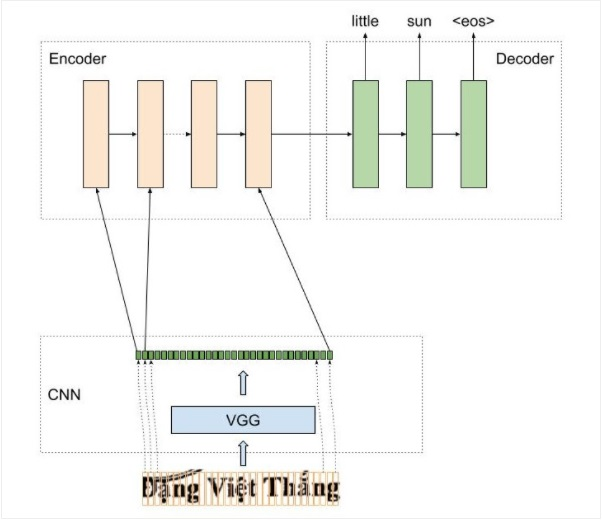

- AttentionOCR là sự kết hợp giữa mô hình CNN và mô hình Attention Seq2Seq. Cách hoạt động của mô hình tương tự như kiến trúc của mô hình seq2seq trong bài toán dịch máy.
- Với bài toán dịch máy từ tiếng việt sang anh, chúng ta cần encode một chuỗi tiếng việt thành một vector đặc trưng, còn trong mô hình AttentionOCR, thì dữ liệu đầu vào này là một ảnh.
- Một ảnh qua mô hình CNN sẽ cho một feature máp có kích thước channel x height x width, feature máp này sẽ trở thành đầu vào cho mô hình LSTM, tuy nhiên mô hình LSTM chỉ nhân đầu cào có kích thước là hidden x time_step. Một cách đơn giản và hợp lý là 2 chiều cuối cùng hight x width của feature maps sẽ được duỗi thẳng.
=> Features maps lúc này sẽ có kích thước phù hợp với yêu cầu của mô hình LSTM.

*Feature maps của mô hình CNN sau khi được flatten thì được truyền vào làm input của mô hình LSTM, tại mỗi thời điểm, mô hình LSTM cần dự đoán từ tiếp theo trong ảnh là gì.*

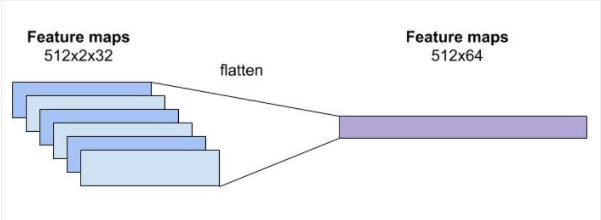

**TransformerOCR**

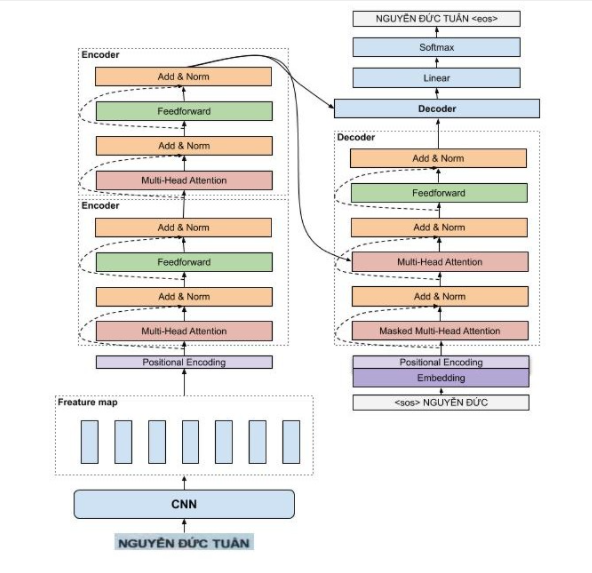

# Transformer

**Transformer**
- Gồm 2 phần là encoder và decoder. Encoder dùng đẻ học vector biểu của câu với mong muốn rằng vector này mang thông tin hoàn hảo của câu đó. Decoder thực hiện chức nắng chuyển vector biểu diễn kia thành ngôn ngữ đích.
- Mô hình này có thể xử lý song song cho các từ. Encoders của mô hình transformeer là một dạng feedforward neural nets, bao gồm nhiều encoder layer khác, mỗi encoder layer này xử lý đồng thời các từ. Trong khi đó, với mô hình LSTM, thì các từ phải được xử lý tuần tự. Ngoài ra, mô hình Transformer còn xử lý câu đầu vào theo 2 hướng mà không cần phải stack thêm một hình LSTM nữa như trong kiến trúc Bidirectional LSTM.

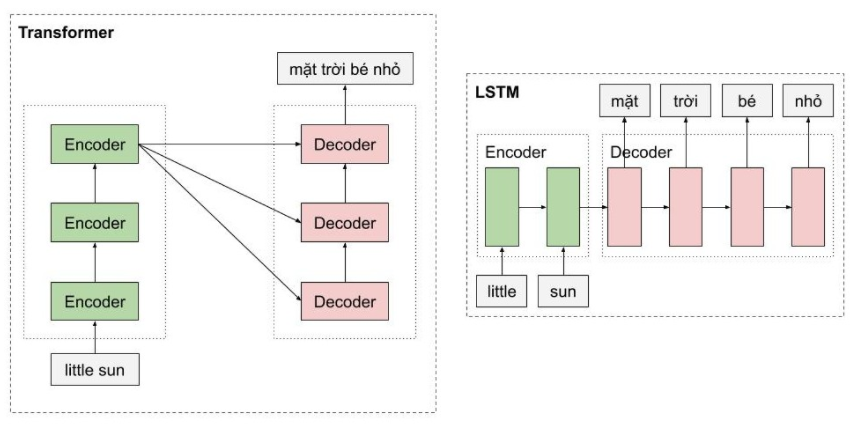

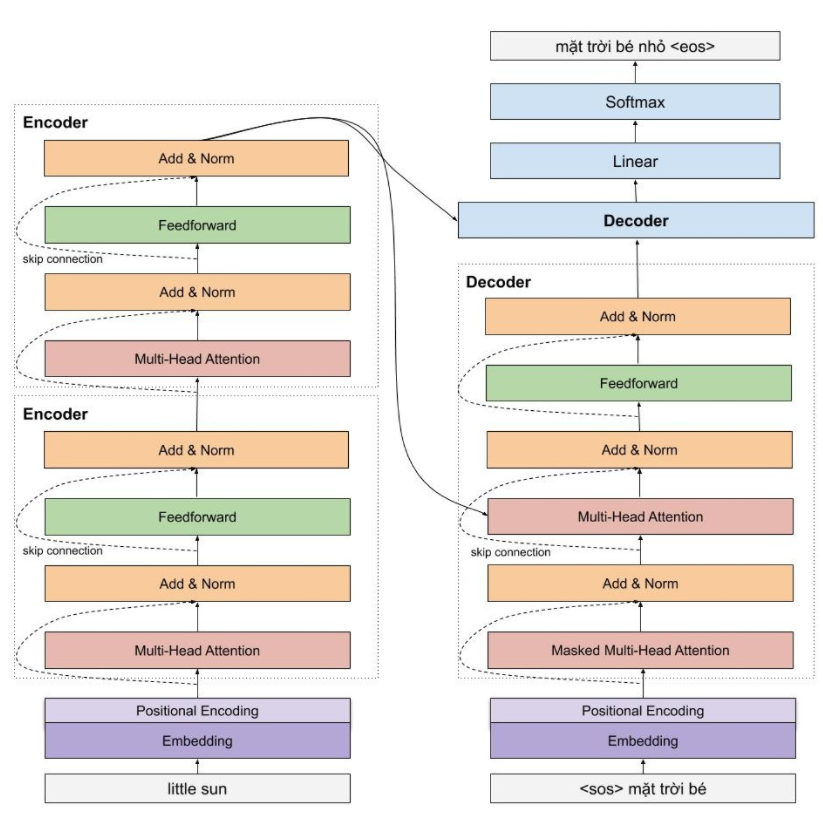

**Embedding Layer with Position Encoding**
Cơ chế dùng để đưa thông tin về vị trí của các từ vào mô hình transformer.

Các từ được biểu diễn bằng một vector sử dụng một ma trận word embedding có số dòng bằng kích thước của tập từ vựng. Sau đó các từ trong cầu được tìm kiếm trong mà trận này, và được nối nhau thành các dòng của một ma trận 2 chiều chưa ngữ nghĩa của từng từ riêng biệt.

Tuy nhiên, word embedding chỉ có thể xử lý từng từ riêng biệt nên positional encoding xuất hiện và giải quyết vấn đề đó.

Nhưng chúng ta gặp ngay vấn đề là khi chuỗi dài thì số này có thể khá lớn, và mô hình sẽ gặp khó khăn khi dự đoán những câu có chiều dài lớn hơn tất cả các câu có trong tập huấn luyện. Để giải quyết vấn đề này, các bạn có thể chuẩn hóa lại cho chuỗi số này nằm trong đoạn từ 0-1 bằng cách chia cho n nhưng mà chúng ta sẽ gặp vấn đề khác là khoảng cách giữa 2 từ liên tiếp sẽ phụ thuộc vào chiều dài của chuỗi, và trong một khoản cố định, chúng ta không hình dùng được khoản đó chứa bao nhiêu từ. Điều này có nghĩa là ý nghĩa của position encoding sẽ khác nhau tùy thuộc vào độ dài của câu đó.

**Phương pháp đề xuất sinusoidal position encoding**
Phương pháp của tác giả đề xuất không gặp những hạn chế mà chúng ta vừa nêu. Vị trí của các từ được mã hóa bằng một vector có kích thước bằng word embedding và được cộng trực tiếp vào word embedding.

----------------------------------------------

**Encoder**
Bao gồm nhiều encoder layer tương tự nhau. mỗi encoder layer của transfoermer lại bao gồm 2 thành phần chính là multi head attention và feedforward network, ngoài ra có cả skip connection và normalization layer.

Encoder đầu tiên sẽ nhận ma trận biểu diễn của các từ đã được cộng với thông tin vị trí thông qua postional encoding. Sau đó, ma trần này sẽ được xử lý bới Multi Head Attention. Multi Head Attention thật chất là self-attention, nhưng mà để mô hình có thể có chú yes nhiều pattern khác nhau   , tác giả đơn giản là sử dụng nhiều self- attention.

**Self Attention Layer**
Self Attention cho phép mô hình khi mã hóa một từ có thể sử dụng thông tin của những từ liên quan tới nó. Đây như là một cơ chế tìm kiếm, với một từ cho trước, cơ chế này sẽ cho phép mô hình tìm kiếm trong các từ còn lại, từ nào "giống" để sau đó thông tin sẽ được mã hóa dựa trên các từ trên.

**Multi Head Attention**
Đẻ có thể học nhiều kiểu mối quan hệ giữa các từ với nhau, cần thêm nhiều self-attention. Cơ chế cho phép mô hình chú ý đồng thời những pattern dễ quan sát ( từ kế trước, kế sau, liên quan của một từ).

**Residuals Connection và Normalization Layer**
Trong kiến trúc của mô hình transformer, residuals connection và normalization layer được sử dụng mọi nơi, giống như tinh thần của nó. 2 kỹ thuật giúp cho mô hình huấn luyện nhanh hội tụ hơn và trách mất mát thông tin trong quá trình huấn luyện mô hình, ví dụ như là thông tin của vị trí các từ được mã hóa.

---------------------------------------

**Decoder**
Decoder thực hiện chức năng giải mã vector của câu nguồn thành câu đích, do đó decoder sẽ nhận thông tin từ encoder là 2 vector key và value.

Kiến trúc của decoder khá giống encoder, ngoại trừ có thêm một multi head attention ở giữa dùng đẻ học mối liên hệ giữa các từ đang được dịch với các từ ở câu nguồn.

**Masked Multi Head Attention**
Đây chính là muli head attention vừa nói ở trên, có chức năng encoder các từ từ câu đích trong quá trình dịch.

Trong decoder còn có một multi head attention khác có chức năng chú ý các từ ở mô hình encoder, layer này nhận vector key và value từ mô hình encoder, và output từ layer phía dưới. Đơn giản bởi vì chúng ta muốn so sánh sự tương quan giữa từ đang được dịch với các từ nguồn.

**Final Fully Connected Layer, Softmax và Loss function**
Giống như nhiều mô hình khác, chúng ta cần thêm một fully connected layer để chuyển output từ layer phía trước thành ma trận có chiều băng số từ mà các bạn cần dự đoán. Sau đó thì đến softmax để các bạn tính được xác suất của từ xuất hiện tiếp theo là bao nhiêu.

Loss function là cross-entropy.

----------------------------------------------------------

**Kỹ thuật huấn luyện Transformer**


1.   Optimizer:  Để huấn luyện mô hình transformer, các bạn vẫn sử dụng Adam, tuy nhiên, learning rate cần phải được điều chỉnh trong suốt quá trình học

2.   Label Smoothing : Với mô hình nhiều triệu tham số của transformer, thì việt overfit là chuyện dễ dàng xảy ra. Để hạn chế hiện tượng overfit, các bạn có thể sử dụng kỹ thuật label smoothing. Về cơ bản thì ý tưởng của kỹ thuật này khá đơn giản, chúng ta sẽ phạt mô hình khi nó quá tự tin vào việc dự đoán của mình. Thay vì mã hóa nhãn là một one-hot vector, các bạn sẽ thay đổi nhãn này một chút bằng cách phân bố một tí xác suất vào các trường hợp còn lại.



# Seq2Seq

**Một số dạng RNN**
- One to one: 1 inpur và 1 output.
- One to many: bài toán 1 input, nhiều output.
- Many to one: nhiều output, 1 input.
- Many to many: bài toán nhiều input và output.

**Seq2Seq**
Input của mô hình là một câu/chuỗi, output là một câu/chuỗi( có thể khác nhau ).
Gồm 2 thành phần decoder và encoder, 2 khối này được kết nối thông qua Vector trung gian(context vector).
- Encoder: bộ mã hóa xử lý từng token trong chuỗi đầu vào, nó cố gắng nhồi nhét toán bộ thông tin đầu vào vào một vector có độ dài cố định, tức là "vector trung gian". Sau đó bộ mã hóa sẽ chuẩn hóa vector này sang bộ giải mã.
- Contect Vector: có chức năng gối gọn toàn bộ ý nghĩa của chuỗi đầu vào và giúp bộ giải mã đưa ra được quyết định chính xác.
- Bộ giải mã- Decoder: Bộ giải mã sử dụng vector trung gian và cố gắng dự đoán chuỗi đích.

***Hạn chế***:
- Kiến trúc chỉ hoạt động tốt với chuỗi ngắn.
- Khó đẻ bộ mã hóa ghi nhớ các chuỗi dài thành một vecotr có độ dài cố định.

**Cơ chế Attention**: Thay vì nhìn vào tất cả những từ trong câu thì có thể tắng tầm quan trọng của một vài từ cụ thể của đầu vào có ý nghĩa với đầu ra/
 Có hai cơ chế Attention khác nhau phụ thuộc vào vector trung gian:

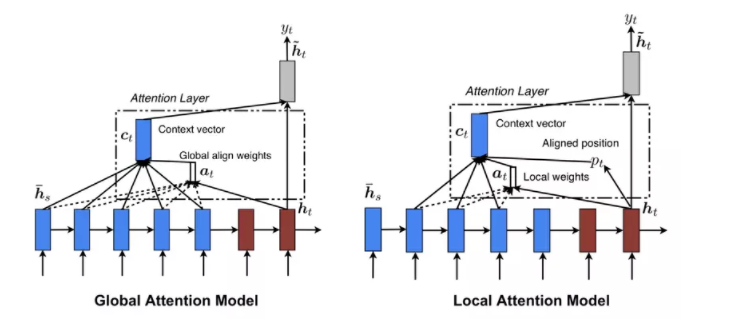

- Global Attention: Tất cả trạng thái ẩn của bộ mã hóa được xem xét đẻ tạo ra vector trung gian.
- Local Attention: Chỉ một vài trạng thái ẩn của bộ mã hóa được xem xét và lấy ra để tạo vector trung gian.

# Cài đặt môi trường


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
!git clone https://github.com/ndcuong91/MC_OCR.git\

In [ ]:
%cd /content/gdrive/MyDrive/MC_OCR

/content/gdrive/MyDrive/MC_OCR


In [ ]:
!pip3 install --upgrade pip
!pip3 install -r requirements.txt
!pip3 install -e 

In [ ]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/text_detector/PaddleOCR
!pip3 install -e 
!python3 -m pip install paddlepaddle==2.0rc1 -i https://mirror.baidu.com/pypi/simple

/content/gdrive/MyDrive/MC_OCR/mc_ocr/text_detector/PaddleOCR

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-e option requires 1 argument
Looking in indexes: https://mirror.baidu.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 MB 5.1 MB/s eta 0:00:00
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20,

In [ ]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/text_classifier/vietocr
!pip3 install -e 

/content/gdrive/MyDrive/MC_OCR/mc_ocr/text_classifier/vietocr

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-e option requires 1 argument


# Trích xuất thông tin quan trọng từ hóa đơn

In [ ]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/data/
!ln -s /content/gdrive/MyDrive/MC-OCR-1/train/train_images// mc_ocr_train
!ln -s /content/gdrive/MyDrive/MC-OCR-1/test/mcocr_private_test_data/test_images// mc_ocr_private_test

/content/gdrive/MyDrive/MC_OCR/mc_ocr/data


#EDA - Phân tích dữ liệu
Tập dữ liệu training có tổng cộng 1155 ảnh. Có rất nhiều ảnh chưa đạt yêu cầu như sai nhãn, nhầm thông tin, ... nên được lọc và lưu tại 1 file mới filter_training_data 

In [ ]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/EDA
!python3 filter_training_data_by_rules.py

/content/gdrive/MyDrive/MC_OCR/mc_ocr/EDA
1 mcocr_public_145013kzjew.jpg filter_training_data_by_rules. Fix TOTAL_TOTAL_COST -> TOTAL_COST
1 mcocr_public_145013dhzmu.jpg filter_training_data_by_rules. Very few keys in img
11 ignore mcocr_public_145013dhzmu.jpg
2 mcocr_public_145013ebiff.jpg filter_training_data_by_rules. Fix ADDRESS -> TIMESTAMP
3 mcocr_public_145013ebiff.jpg filter_training_data_by_rules. Fix TIMESTAMP -> TOTAL_COST
4 mcocr_public_145013ebiff.jpg 31.700 filter_training_data_by_rules. Fix TIMESTAMP -> TOTAL_COST
2 mcocr_public_145013nwksx.jpg filter_training_data_by_rules. Very few keys in img
67 ignore mcocr_public_145013nwksx.jpg
5 mcocr_public_145013udktj.jpg filter_training_data_by_rules. Fix TOTAL_COST -> TIMESTAMP
6 mcocr_public_145013udktj.jpg filter_training_data_by_rules. Fix TIMESTAMP -> TOTAL_COST
3 mcocr_public_145013bomoz.jpg filter_training_data_by_rules. Very few keys in img
81 ignore mcocr_public_145013bomoz.jpg
4 mcocr_public_145013tgayt.jpg filter_tra

*Sau khi lọc sẽ chỉ còng 1090 ảnh* 

In [ ]:
!pip install Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.6 MB/s eta 0:00:00


*Tiếp theo sẽ lọc ra danh sách tên cửa hàng + với địa chỉ từ dữ liệu training*

In [ ]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/EDA
!python3 get_store_dict.py

/content/gdrive/MyDrive/MC_OCR/mc_ocr/EDA
1 mcocr_public_145013ddcph.jpg
2 mcocr_public_145013fxcgs.jpg
3 mcocr_public_145013clltn.jpg
4 mcocr_public_145013tmibr.jpg
5 mcocr_public_145013kgypr.jpg
6 mcocr_public_145013cixex.jpg
7 mcocr_public_145013qxxxo.jpg
8 mcocr_public_145013eknsk.jpg
9 mcocr_public_145013kzjew.jpg
10 mcocr_public_145013jechb.jpg
11 mcocr_public_145013tumhj.jpg
12 mcocr_public_145013xbegl.jpg
13 mcocr_public_145013vxrqg.jpg
14 mcocr_public_145013zftfo.jpg
15 mcocr_public_145013vullg.jpg
16 mcocr_public_145013nvoah.jpg
17 mcocr_public_145013pbggg.jpg
18 mcocr_public_145013eygxv.jpg
19 mcocr_public_145013qwmeo.jpg
20 mcocr_public_145013pedoz.jpg
21 mcocr_public_145013rtwyd.jpg
22 mcocr_public_145013jzyzz.jpg
23 mcocr_public_145013sbulh.jpg
24 mcocr_public_145013pvwgq.jpg
25 mcocr_public_145013imsqw.jpg
26 mcocr_public_145013apigo.jpg
27 mcocr_public_145013vmzzn.jpg
28 mcocr_public_145013rrmow.jpg
29 mcocr_public_145013dwbmu.jpg
30 mcocr_public_145013eyjmn.jpg
31 mcoc

*Kết quả sẽ được lưu dưới file json là final_data.json. Đây là file sẽ chứa thông tin của danh sách cửa hàng(tên và đại chỉ)*

In [16]:
!pip install paddleocr
!pip install paddlepaddle

     |████████████████████████████████| 288 kB 5.3 MB/s 
     |████████████████████████████████| 55.7 MB 1.3 MB/s 
     |████████████████████████████████| 2.7 MB 29.4 MB/s 
     |████████████████████████████████| 948 kB 39.6 MB/s 
     |████████████████████████████████| 603 kB 36.5 MB/s 
     |████████████████████████████████| 1.1 MB 33.9 MB/s 
     |████████████████████████████████| 50 kB 3.9 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 15.7 MB 200 kB/s 
     |████████████████████████████████| 404 kB 42.7 MB/s 
     |████████████████████████████████| 127 kB 46.9 MB/s 
     |████████████████████████████████| 2.1 MB 31.9 MB/s 
     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 195 kB 37.2 MB/s 
     |████████████████████████████████| 69 kB 7.7 MB/s 
     |████████████████████████████████| 42 kB 461 kB/s 
     |████████████████████████████████| 2.0 MB 34.7 MB/s 
     |███████████████████

     |████████████████████████████████| 108.4 MB 27 kB/s 


In [ ]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/text_detector/PaddleOCR
!python3 tools/infer/predict_det.py

/content/gdrive/MyDrive/MC_OCR/mc_ocr/text_detector/PaddleOCR
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: Depr

In [ ]:
!pip install Levenshtein

     |████████████████████████████████| 258 kB 5.1 MB/s 
     |████████████████████████████████| 2.1 MB 48.4 MB/s 


In [ ]:
!pip install einops

In [ ]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/rotation_corrector
!python3 process_mc_ocr_data.py

Streaming output truncated to the last 5000 lines.
Visualize time: 1.400099277496338 seconds

 286 Inference mcocr_public_145013uixud.jpg
get boxes from icdar time: 0.23825836181640625 seconds
Classifier_Vietocr. Inference 36 boxes
mean prob: 0.8307708583834947
Multiscale OCR time: 0.0 seconds
Total predict time: 1.9831533432006836 seconds
Save visualized result to /content/gdrive/MyDrive/MC-OCR-1/Data/viz_imgs/mcocr_public_145013uixud.jpg
Visualize time: 1.376626968383789 seconds

 287 Inference mcocr_public_145013unjxn.jpg
get boxes from icdar time: 0.21551990509033203 seconds
Classifier_Vietocr. Inference 29 boxes
mean prob: 0.5626250486738134

 288 Inference mcocr_public_145013uomce.jpg
get boxes from icdar time: 0.18125510215759277 seconds
Classifier_Vietocr. Inference 19 boxes
mean prob: 0.8125155960920963
Multiscale OCR time: 0.0 seconds
Total predict time: 1.1177585124969482 seconds
Save visualized result to /content/gdrive/MyDrive/MC-OCR-1/Data/viz_imgs/mcocr_public_145013uomc

In [6]:
!pip install trdg

     |████████████████████████████████| 91.2 MB 19 kB/s 
     |████████████████████████████████| 17.3 MB 433 kB/s 
     |████████████████████████████████| 60.4 MB 1.3 MB/s 
  Created wheel for diffimg: filename=diffimg-0.2.3-py3-none-any.whl size=4049 sha256=4930bca2ad13cefb4446894feb76f16a8637510574df2126e43adf09be5fdb59
  Stored in directory: /root/.cache/pip/wheels/6c/5d/60/bde2a959be56bca572bd67d49ebd52844d2ef933e85601dfa9
Successfully built diffimg
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires t

In [7]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/rotation_corrector
!python3 data_process.py

/content/gdrive/MyDrive/MC_OCR/mc_ocr/rotation_corrector
Missing modules for handwritten text generation.
generated 0 images
generated 1000 images
generated 2000 images
generated 3000 images
generated 4000 images
generated 5000 images
generated 6000 images
generated 7000 images
generated 8000 images
generated 9000 images
generated 10000 images
generate synthetic images done!


In [3]:
!pip install yacs

In [8]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/rotation_corrector
!python3 train_config.py --cfg experiments/mobilenetv3_filtered_public_train.yaml

/content/gdrive/MyDrive/MC_OCR/mc_ocr/rotation_corrector
2022-03-02 02:10:26,338 - INFO - Namespace(cfg='experiments/mobilenetv3_filtered_public_train.yaml')
2022-03-02 02:10:26,341 - INFO - AUTO_RESUME: False
DATASET:
  DATASET: rotation_corrector
  NUM_CLASSES: 2
  ROOT: 
  TEST_LIST: /content/gdrive/MyDrive/MC-OCR-1/data/line_cropped/val.txt
  TRAIN_LIST: /content/gdrive/MyDrive/MC-OCR-1/data/line_cropped/train.txt
DEBUG:
  DEBUG: False
GPUS: 0
LOG_DIR: log
MODEL:
  BACKBONE: 
  HEAD: 
  NAME: mobilenetv3
  PRETRAINED: 
OUTPUT_DIR: output
TEST:
  BATCH_SIZE: 256
  CENTER_CROP_TEST: False
  IMAGE_SIZE: [64, 192]
  MODEL_FILE: 
TRAIN:
  BATCH_SIZE: 256
  BEGIN_EPOCH: 0
  DROPOUT: 0.2
  END_EPOCH: 50
  IMAGE_SIZE: [64, 192]
  LR: 0.001
  OPTIMIZER: adam
  PRINT_FREQ: 100
  RANDOM_CROP: True
  RESIZE: False
  RESUME: True
  SHUFFLE: True
  VALIDATION_EPOCH: 1
WORKERS: 4
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:288: UserWarning: Argument interpolation s

In [ ]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/text_detector/PaddleOCR
!python3 tools/infer/predict_det.py

/content/gdrive/MyDrive/MC_OCR/mc_ocr/text_detector/PaddleOCR
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: Depr

In [1]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/rotation_corrector
!python3 inference.py

Streaming output truncated to the last 5000 lines.
{'0': 20, '180': 0}
2.3090716748134525
get boxes from icdar time: 0.28438878059387207 seconds

 91 Inference mcocr_public_145013esetg.jpg
{'0': 41, '180': 2}
4.861556680648135
get boxes from icdar time: 0.528292179107666 seconds

 92 Inference mcocr_public_145013euvfm.jpg
{'0': 44, '180': 0}
3.6138946590214687
get boxes from icdar time: 0.8300001621246338 seconds

 93 Inference mcocr_public_145013eygxv.jpg
{'0': 17, '180': 0}
2.3137314015435777
get boxes from icdar time: 0.45395851135253906 seconds

 94 Inference mcocr_public_145013eyjmn.jpg
{'0': 35, '180': 1}
3.6329647198915893
get boxes from icdar time: 0.9778587818145752 seconds

 95 Inference mcocr_public_145013ezyfw.jpg
{'0': 55, '180': 2}
5.273916252477733
get boxes from icdar time: 0.7181034088134766 seconds

 96 Inference mcocr_public_145013famty.jpg
{'0': 29, '180': 3}
3.094069965541479
get boxes from icdar time: 0.41205263137817383 seconds

 97 Inference mcocr_public_145013f

In [3]:
!pip install einops

In [4]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/text_classifier
!python3 pred_ocr.py

/content/gdrive/MyDrive/MC_OCR/mc_ocr/text_classifier
Use GPU 0
Classifier_Vietocr. Init
Init models time: 10.354619979858398 seconds

 0 Inference mcocr_public_145013aagqw.jpg
get boxes from icdar time: 0.0017604827880859375 seconds
Classifier_Vietocr. Inference 58 boxes
Classifier_Vietocr. Inference 58 boxes
Classifier_Vietocr. Inference 58 boxes
Multiscale OCR time: 5.407532215118408 seconds
Total predict time: 5.409292697906494 seconds

 1 Inference mcocr_public_145013aaprl.jpg
get boxes from icdar time: 0.0020313262939453125 seconds
Classifier_Vietocr. Inference 39 boxes
Classifier_Vietocr. Inference 39 boxes
Classifier_Vietocr. Inference 39 boxes
Multiscale OCR time: 4.498711347579956 seconds
Total predict time: 4.500742673873901 seconds

 2 Inference mcocr_public_145013acjke.jpg
get boxes from icdar time: 0.0016751289367675781 seconds
Classifier_Vietocr. Inference 37 boxes
Classifier_Vietocr. Inference 37 boxes
Classifier_Vietocr. Inference 37 boxes
Multiscale OCR time: 4.360584

In [8]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/rotation_corrector
!python3 rotate_csv.py

/content/gdrive/MyDrive/MC_OCR/mc_ocr/rotation_corrector
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:288: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
1 mcocr_public_145013ddcph.jpg
{'0': 36, '180': 1}
2 mcocr_public_145013fxcgs.jpg
{'0': 30, '180': 1}
3 mcocr_public_145013clltn.jpg
{'0': 42, '180': 1}
4 mcocr_public_145013tmibr.jpg
{'0': 147, '180': 10}
5 mcocr_public_145013kgypr.jpg
{'0': 2, '180': 34}
6 mcocr_public_145013cixex.jpg
{'0': 49, '180': 4}
7 mcocr_public_145013qxxxo.jpg
{'0': 30, '180': 2}
8 mcocr_public_145013eknsk.jpg
{'0': 41, '180': 0}
9 mcocr_public_145013kzjew.jpg
{'0': 40, '180': 1}
10 mcocr_public_145013jechb.jpg
{'0': 47, '180': 1}
11 mcocr_public_145013tumhj.jpg
{'0': 32, '180': 0}
12 mcocr_public_145013xbegl.jpg
{'0': 23, '180': 1}
13 mcocr_public_145013vxrqg.jpg
{'0': 32,

In [3]:
!pip install Levenshtein

     |████████████████████████████████| 258 kB 5.4 MB/s 
     |████████████████████████████████| 2.1 MB 58.3 MB/s 


In [4]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/key_info_extraction
!python3 create_train_data.py

/content/gdrive/MyDrive/MC_OCR/mc_ocr/key_info_extraction
Traceback (most recent call last):
  File "create_train_data.py", line 250, in <module>
    os.symlink(rot_out_img_dir, os.path.join(kie_train_dir,'images'))
FileExistsError: [Errno 17] File exists: '/content/gdrive/MyDrive/MC-OCR-1/rotation_corrector/mc_ocr_train_filtered/imgs' -> '/content/gdrive/MyDrive/MC-OCR-1/key_info_extraction/mc_ocr_train_filtered/images'


In [6]:
from torchtext.legacy.data import Field, TabularDataset, BucketIterator, Iterator

In [9]:
!pip install -U torchtext

     |████████████████████████████████| 8.0 MB 5.4 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:39tcmalloc: large alloc 1147494400 bytes == 0x5601616b4000 @  0x7fc0c0a3b615 0x560127f403bc 0x56012802118a 0x560127f431cd 0x560128035b3d 0x560127fb7458 0x560127fb202f 0x560127f44aba 0x560127fb72c0 0x560127fb202f 0x560127f44aba 0x560127fb3cd4 0x560128036986 0x560127fb3350 0x560128036986 0x560127fb3350 0x560128036986 0x560127fb3350 0x560127f44f19 0x560127f88a79 0x560127f43b32 0x560127fb71dd 0x560127fb202f 0x560127f44aba 0x560127fb3cd4 0x560127fb202f 0x560127f44aba 0x560127fb2eae 0x560127f449da 0x560127fb3108 0x560127fb202f
     |████████████████████████████████| 881.9 MB 1.8 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.11.0
    Uninstalling torchtext-0.11.0:
  

In [10]:
%cd /content/gdrive/MyDrive/MC_OCR/mc_ocr/key_info_extraction/PICK
!bash run.sh

/content/gdrive/MyDrive/MC_OCR/mc_ocr/key_info_extraction/PICK
/usr/local/lib/python3.7/dist-packages/torch/distributed/launch.py:186: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use_env is set by default in torchrun.
If your script expects `--local_rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  FutureWarning,
Traceback (most recent call last):
  File "train.py", line 14, in <module>
    import model.pick as pick_arch_module
  File "/content/gdrive/MyDrive/MC_OCR/mc_ocr/key_info_extraction/PICK/model/pick.py", line 12, in <module>
    from .graph import GLCN
  File "/content/gdrive/MyDrive/MC_OCR/mc_ocr/key_info_extraction/PICK/model/graph.py", line 13, in <module>
    from data_utils import documents
  File "/content/gdrive/MyDrive/MC_OCR/mc_ocr/key_info_extraction/PI

In [12]:
%cd /content/gdrive/MyDrive/MC_OCR/image_quality_evaluation
!python3 train.py --train_mode=1 --path_file=/content/gdrive/MyDrive/MC-OCR-1/data/line_cropped/train.txt  --img_size=640

/content/gdrive/MyDrive/MC_OCR/image_quality_evaluation
Traceback (most recent call last):
  File "train.py", line 155, in <module>
    net = net.cuda()
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 680, in cuda
    return self._apply(lambda t: t.cuda(device))
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 570, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 570, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 570, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 593, in _apply
    param_applied = fn(param)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 680, in <lambda>
    return self._apply(lambda t: t.cuda(device))
  File "/usr/local/lib/python3.7/dist-packages/torch/cuda/__init__.py", line 